**Contact rate** how often do infected and susceptible people come in contact?

**Risk of infection** during contact, what is the chance of the spread of the disease?

* 100% risk of infection

* Encounters 1 person per day

In [9]:
# 1 person 1 * 0 

In [10]:
1 * 1.0

1.0

* 50% risk of infection

* Encounters one person every day

In [14]:
# 1 person * 0.5

In [15]:
1 * 0.5

0.5

 "Infects 0.5 people per day"

* 25% risk of infection

* Encounters 10 people per day

In [17]:
# 10 person, 25% risk

In [18]:
10 * 0.25 

2.5

"I infect 2.5 people each day"

### Not every day

* 50% risk of infection

* Encounter 1 person per day

In [19]:
1 * 0.5 

0.5

* 50% risk of infection

*  Encounter 1 person every WEEK

In [20]:
(1/7) * 0.5

0.07142857142857142

"I infect ~0.7 people every day"

**Effective contact rate** the contacts that will effectively infect another person. The big number for moving from susceptible to infected.

**2 Infected to removed**

Two ways to move from infected to removed: 

* Get better

* Die

**Recovery period** how long it takes to recover

In [22]:
# Recovery period of 4 days

In [23]:
1/4

0.25

**Removal rate:** `1/recoveryperiod`, this is the rate at which people stop being infected

* Our recovery period is 4 days

* We have 100 sick people on day 10, how many recover on day 11?

In [27]:
# What is our removal rate? 1/4

In [28]:
100 * (1/4)

25.0

"25 infected people are removed on day 11"

* If our recovery period is 10 days

* And 200 sick people are present on day 10

* How many recover on day 11?

In [29]:
# What is our removal rate? 1/10

In [30]:
200 * (1/10)

20.0

"On day 11 we have 20 people transition from infected to removed"

**What is R0?**

Movement between components:

* S to I is **effective constant rate** `contact_rate * risk_of_infection`

* I to R is **removal rate:** `1 / recovery_period`

* 100% risk of infection

* Encounter one person per day

* Takes 3 days to recover from disease

In [3]:
#Effective contact rate

In [2]:
1 * 1.0

1.0

In [4]:
#Removal rate

In [5]:
1/3

0.3333333333333333

In [8]:
# Basic reproductive rate: effective contact rate/removal rate

In [7]:
1/0.3333333333333333

3.0

* 50% risk of infection 

* Encounter one person each day

* Takes 4 days to recover from disease

In [10]:
#Effective contact rate

In [11]:
1*0.5

0.5

In [12]:
#Removal rate

In [13]:
1/4

0.25

In [14]:
#Basic reproductive rate: effective contact rate/ removal rate

In [15]:
0.5/0.25

2.0

* 2% risk of infection

* Encounter two people every day

* Takes 21 days to recover from disease

In [17]:
#Effective contact rate

In [19]:
2 * 0.02

0.04

In [20]:
#Removal rate

In [24]:
1/21

0.047619047619047616

In [22]:
#Basic reproductive rate: effective contact rate/removal rate

In [25]:
0.04/0.047619047619047616

0.8400000000000001

In [29]:
"Is the R0 above 1 or not?"

'Is the R0 above 1 or not?'

* If **ABOVE ONE**: Disease will spread

* If **Below One**: Disease dies out

* 100% risk of infection

* Encounter one person a day

* Takes 3 days to recover from disease

In [31]:
#Effective contact rate

In [32]:
(1*1.0)

1.0

In [36]:
#Removal rate

In [33]:
(1/3)

0.3333333333333333

In [34]:
#R0

In [35]:
1/0.3

3.3333333333333335

**Greater than 1, disease will spread**

* 100% risk of infection

* Encounter one person per day

* Takes 1 day to recover from disease

In [39]:
#Effective contact rate

In [40]:
1*1

1

In [41]:
#Removal rate

In [42]:
1/1

1.0

In [43]:
#R0

In [44]:
1.0/1.0

1.0

**For each day that I am sick, I get another person sick. By the next day I am considered recovered, meaning I am healed or dead, preventing me from spreading the disease any further.** 

* 100% risk of infection

* Meet one person per day

* Takes 0.5 day to recover from disease

In [46]:
#Effective contact rate

In [47]:
1*1

1

In [48]:
#Removal rate

In [49]:
1/0.5

2.0

In [50]:
#R0

In [51]:
1/2

0.5

* If you were to have lunch with someone: you would be **infected** and infect them

* If you were to have dinner with someone that same day: you would be **recovered** and not infect them

**SIR modeling with Python**

In [2]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [3]:
# The SIR model differential equations.
def deriv(state, t, N, beta, gamma):
    S, I, R = state
    # Change in S population over time
    dSdt = -beta * S * I / N
    # Change in I population over time
    dIdt = beta * S * I / N - gamma * I
    # Change in R population over time
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

Start by modeling our population. Having a thousand people and one infected person is the ratio I opted for

**Effective contact rate** is `transmission rate * contact rate`

* For example, 5% transmission rate with 5 contacts a day is shown as `0.05 * 5 = 0.25`

**Recover rate** is `1/ day`

* For example, 4 day recovery rate is `1/ 4 = 0.25`

R0 is 4.550000000000001


<Axes: xlabel='day'>

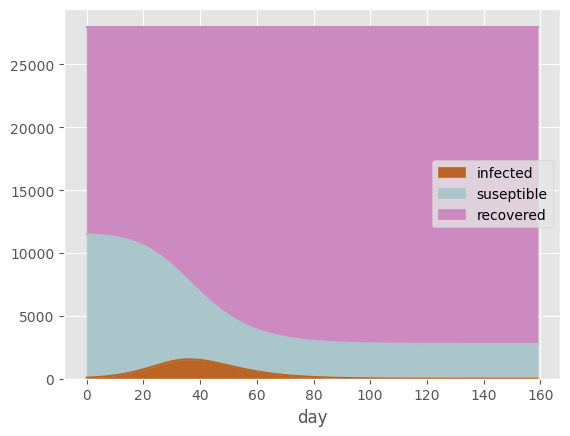

In [70]:
effective_contact_rate = 0.65
recoveryRate = 1/7

# We'll compute this for fun
print("R0 is", effective_contact_rate / recoveryRate)

# What's the start population look like?
# Everyone not infected or recovered is susceptible
totalPop = 28000
recovered = 16500
infected = 83
susceptible = totalPop - infected - recovered

# A list of days, 0-160
days = range(0, 160)

# Use differential equations magic with our population
ret = odeint(deriv,
             [susceptible, infected, recovered],
             days,
             args=(totalPop, effective_contact_rate, recoveryRate))
S, I, R = ret.T

# Build a dataframe because why not
df = pd.DataFrame({
    'suseptible': S,
    'infected': I,
    'recovered': R,
    'day': days
})

plt.style.use('ggplot')
df.plot(x='day',
        y=['infected', 'suseptible', 'recovered'],
        color=['#bb6424', '#aac6ca', '#cc8ac0'],
        kind='area',
        stacked=True)

# If you get the error:
#
#     When stacked is True, each column must be either all
#     positive or negative.infected contains both...
#
# just change stacked=True to stacked=False

In [65]:
df

,suseptible,infected,recovered,day
0,999.000000,1.000000,0.000000,0
1,998.432853,1.283209,0.283938,1
2,997.705673,1.646096,0.648231,2
3,996.773817,2.110734,1.115449,3
4,995.580518,2.705094,1.714388,4
...,...,...,...,...
155,202.845901,0.000002,797.154096,155
156,202.845901,0.000002,797.154097,156
157,202.845901,0.000002,797.154097,157
158,202.845901,0.000002,797.154098,158
